In [5]:
import numpy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

data=pd.read_excel('C:/Users/XHM/Desktop/data/TFT/train.xlsx',engine='openpyxl')
all_input=data[['Vg','Vd','W/L']].values
all_output=data[['Id','gm','gd']].values
z=preprocessing.StandardScaler()
#all_output=minmax.fit_transform(data['Idrain'].values.reshape(-1,1))

(x_train,x_test,y_train,y_test)=train_test_split(all_input,all_output,train_size=0.8,
                                                 random_state=0)
a=np.std(x_train,axis = 0)
b=np.mean(x_train,axis=0)
print(x_train[0,:])
#标准化处理
x_train=z.fit_transform(x_train)
print(a,b,x_train[0,:])
x_test=z.transform(x_test)
#z.inverse_transform



#数据类型处理
train_xt=torch.from_numpy(x_train.astype(np.float32))
train_yt=torch.from_numpy(y_train.astype(np.float32))
test_xt=torch.from_numpy(x_test.astype(np.float32))
test_yt=torch.from_numpy(y_test.astype(np.float32))
#将数据处理为数据加载器
train_data=Data.TensorDataset(train_xt,train_yt.float())
test_data=Data.TensorDataset(test_xt,test_yt.float())

train_loader=Data.DataLoader(dataset=train_data,batch_size=32,shuffle=True,num_workers=0)
test_loader=Data.DataLoader(dataset=test_data,batch_size=32,shuffle=False,num_workers=0)
 

[20.1 17.2  0.5]
[8.77745222 6.79017906 1.95221757] [8.82794673 8.05460147 1.68144504] [ 1.2842056   1.34685675 -0.60518103]


In [6]:
15#搭建MLP回归模型
class MLPregression(nn.Module):
    def __init__(self):
        super(MLPregression,self).__init__()
        self.input=nn.Linear(in_features=3,out_features=15,bias=True)
        self.act1=nn.LogSigmoid()
        #定义第二个隐藏层
        self.hidden2=nn.Linear(15,8)
        self.act2=nn.LogSigmoid()
        #回归预测层
        self.predict=nn.Linear(8,1)
        # self.activate=nn.LogSigmoid()
    def forward(self,x):
        x1=self.input(x)
        a1=self.act1(x1)
        x2=self.hidden2(a1)
        a2=self.act2(x2)
        output=self.predict(a2)
        return output[:,0]
mlp=MLPregression()
print(mlp)

def loss_function(id_pre,ids,g_pre,gm,gd):
    loss_func=nn.MSELoss()
    gm_pre=g_pre[:,0]
    gd_pre=g_pre[:,1]
    for i in range(len(gm)):
        if gm[i]==0:
            gm_pre[i]=0
        elif gd[i]==0:
            gd_pre[i]=0
    j=(0.9*loss_func(id_pre,ids)+0.1*loss_func(gm_pre,gm)+0.1*loss_func(gd_pre,gd))
    return j

MLPregression(
  (input): Linear(in_features=3, out_features=15, bias=True)
  (act1): LogSigmoid()
  (hidden2): Linear(in_features=15, out_features=8, bias=True)
  (act2): LogSigmoid()
  (predict): Linear(in_features=8, out_features=1, bias=True)
)


epoch:0 loss:3164.507075804226
epoch:50 loss:157.2701944718047
epoch:100 loss:72.34151830923106
epoch:150 loss:63.78043151120858
epoch:200 loss:57.226372877213564
epoch:250 loss:51.94386781168231
epoch:300 loss:45.75213823476211
epoch:350 loss:14.839076821440873
epoch:400 loss:6.439643506314826
epoch:450 loss:4.7459033707742
epoch:500 loss:3.6273329364260407
epoch:550 loss:3.073273673503143
epoch:600 loss:2.7203664341888145
epoch:650 loss:2.45979864704293
epoch:700 loss:2.2778635849223656
epoch:750 loss:2.069359728524392
epoch:800 loss:1.9651462293325992
epoch:850 loss:1.8638779164840595
epoch:900 loss:1.7904571891843475
epoch:950 loss:1.7441734572937466
epoch:1000 loss:1.68556299507614
epoch:1050 loss:1.6867601061542346
epoch:1100 loss:1.5845072423476374
epoch:1150 loss:1.4671009139527893
epoch:1200 loss:1.494835171201837
epoch:1250 loss:1.4714354812674826
epoch:1300 loss:1.4042718941957701
epoch:1350 loss:1.3932605682851833
epoch:1400 loss:1.4088944551742097
epoch:1450 loss:1.4204433

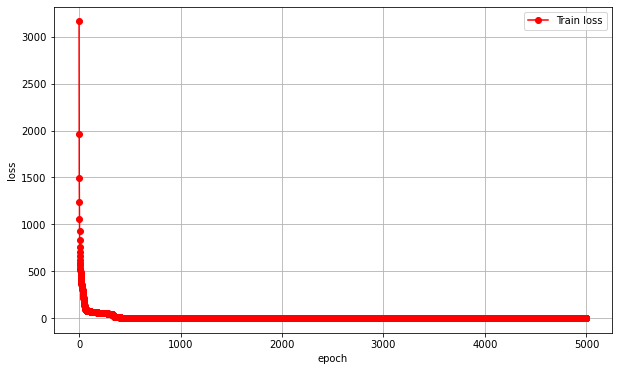

[('input', Linear(in_features=3, out_features=15, bias=True)), ('act1', LogSigmoid()), ('hidden2', Linear(in_features=15, out_features=8, bias=True)), ('act2', LogSigmoid()), ('predict', Linear(in_features=8, out_features=1, bias=True))]
tensor([-0.4242,  0.3192,  0.2266,  ...,  8.6402,  2.5606, 17.5249],
       grad_fn=<SelectBackward>)
tensor([[-1.5290e-05,  7.5250e-05,  0.0000e+00],
        [ 1.4500e-01,  0.0000e+00,  3.6000e-03],
        [-1.3060e-05,  1.2550e-05,  0.0000e+00],
        ...,
        [ 8.2974e+00,  1.8240e+00,  0.0000e+00],
        [ 2.4059e+00,  5.8900e-01,  0.0000e+00],
        [ 1.7150e+01,  2.2700e+00,  0.0000e+00]])


In [7]:
#定义优化器
optimizer=torch.optim.Adam(mlp.parameters(),lr=0.001)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1, last_epoch=-1)
lr_list_1 = []
loss_func=nn.MSELoss()
train_loss_all=[]
for epoch in range(5000):
    train_loss=0
    train_num=0
    for step,(b_x,b_y) in enumerate(train_loader):
        output=mlp(b_x)
        
        b_x.requires_grad_(True)
        y=mlp(b_x)
        y.retain_grad()
        b_x.grad
        y.backward(torch.ones_like(y))
        g_p=b_x.grad
        g_pre=g_p*1/a
        
        #loss=loss_func(output,b_y[:,0])
        loss=loss_function(output,b_y[:,0],g_pre,b_y[:,1],b_y[:,2])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        #lr_list_1.append(optimizer_Adam.state_dict()['param_groups'][0]['lr'])
        train_loss+=loss.item()*b_x.size(0)
        train_num+=b_x.size(0)
    train_loss_all.append(train_loss/train_num)
    
    
    
    
    if epoch%50==0:
        print('epoch:{}'.format(epoch),'loss:{}'.format(train_loss/train_num))

plt.figure(figsize=(10,6))
plt.plot(train_loss_all,"ro-",label="Train loss")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#预测

pre_y=mlp(test_xt)
print(list(mlp.named_children()))
#torch.save(mlpreg,'C:/Users/XHM/Desktop/MLP/mlp_model.pth')



#pre_y=mm.inverse_transform(pre_y.data.reshape(-1,1))
print(pre_y)
print(test_yt)


In [8]:
import torchvision
name=list(mlp.named_children()) #获取模型每一层的name
print(name)
'''for layer1 in iter(name):
    print(layer1)
    level1=getattr(mlp,layer1[0])
    backbone=torchvision.models._utils.IntermediateLayerGetter(level1,{"":layer1[0]})
    backbone.eval()
    out1=backbone(test_xt)'''

l1=torchvision.models._utils.IntermediateLayerGetter(mlp,{'act1':'a1'})
l2=torchvision.models._utils.IntermediateLayerGetter(mlp,{'act2':'a2'})
l3=torchvision.models._utils.IntermediateLayerGetter(mlp,{'predict':'output'})

out1=l1(train_xt)
out1=out1["a1"]
out2=l2(train_xt)
out2=out2['a2']
out3=l3(train_xt)
out3=out3['output']

df1=pd.DataFrame(out1.detach().numpy())
df2=pd.DataFrame(out2.detach().numpy())
df3=pd.DataFrame(out3.detach().numpy())

df1.to_csv('C:/Users/XHM/Desktop/data/weight/activate/vg-sub-x1.csv',index=False,sep=',')
df2.to_csv('C:/Users/XHM/Desktop/data/weight/activate/vg-sub-x2.csv',index=False,sep=',')
df3.to_csv('C:/Users/XHM/Desktop/data/weight/activate/vg-sub-out.csv',index=False,sep=',')

print(mlp(train_xt))


[('input', Linear(in_features=3, out_features=15, bias=True)), ('act1', LogSigmoid()), ('hidden2', Linear(in_features=15, out_features=8, bias=True)), ('act2', LogSigmoid()), ('predict', Linear(in_features=8, out_features=1, bias=True))]
tensor([30.3743,  5.6945,  0.1759,  ..., -0.0599,  7.1247, -0.0602],
       grad_fn=<SelectBackward>)


In [152]:
def neural(x):
    l1=torchvision.models._utils.IntermediateLayerGetter(mlp,{'act1':'a1'})
    out1=l1(x)
    out1=out1['a1']
    a=out1[:,0].data
    return a


In [153]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import math

E:\Install\Anaconda\envs\pytorch\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


torch.Size([8000, 3]) (8000,)
           ST   ST_conf
Vg   0.915132  0.064796
Vd   0.057338  0.004635
W/L  0.026201  0.002346
           S1   S1_conf
Vg   0.913081  0.074941
Vd   0.056617  0.020584
W/L  0.027248  0.012519
                 S2   S2_conf
(Vg, Vd)   0.004057  0.095404
(Vg, W/L)  0.002247  0.093153
(Vd, W/L) -0.000379  0.028647

S1: [0.9130807  0.05661731 0.02724784]
x1-x2: 0.004056970457136606
x1-x3: 0.002246711279721675
x2-x3: -0.00037851250521338947


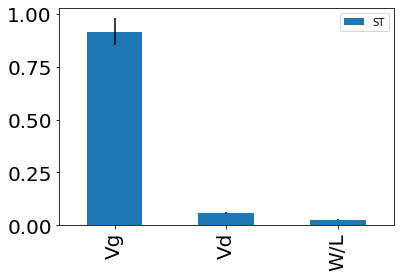

In [154]:
problem = {
    'num_vars': 3,
    'names': ['Vg', 'Vd', 'W/L'],
    'bounds': [[0,10],
               [0,10],
               [0, 10]]
}

param_values = saltelli.sample(problem, 1000)
param_values=torch.from_numpy(param_values.astype(np.float32))

# Run model (example)
Y = neural(param_values)
Y=Y.detach().numpy()
print(param_values.shape, Y.shape)
# Perform analysis (这里运行完成后会自动对结果进行展示)
Si = sobol.analyze(problem, Y, print_to_console=True)
print()

# Print the first-order sensitivity indices  一阶灵敏度
print('S1:', Si['S1'])

# Print the second-order sensitivity indices   二阶灵敏度
print("x1-x2:", Si['S2'][0, 1])
print("x1-x3:", Si['S2'][0, 2])
print("x2-x3:", Si['S2'][1, 2])



from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

Si_df = Si.to_df()
barplot(Si_df[0])
plt.tick_params(labelsize=20)
plt.savefig('大1.jpg',dpi=600,format='jpg')
plot.show()

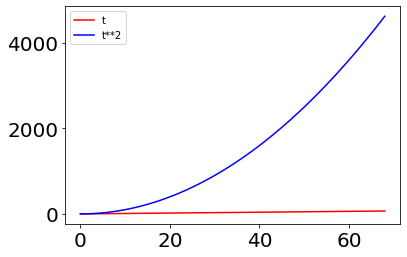

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 69, 1)
plt.plot(t, t, 'r', t, t**2, 'b')
label = ['t', 't**2']
plt.legend(label, loc='upper left')
plt.tick_params(labelsize=20)
plt.show()
